<a href="https://colab.research.google.com/github/SamuelLawrence876/Jamaica-Stock-Exchange---LTSM-deep-learning/blob/master/Time_series_LTSM_Jamaica_Stock_Exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
url = 'https://www.jamstockex.com/market-data/download-data/index-history/main-market/JSE-Index/2010-08-08/2020-08-10'
df = pd.read_html(url)

In [ ]:
jse = df[0] 

In [ ]:
jse.head()

,Date,Index,Value,Change,Change (%),Volume Traded
0,Aug-09-2010,JSE Index,86537.90,-293.10,-0.34%,1371526
1,Aug-10-2010,JSE Index,86252.56,-285.34,-0.33%,815629
2,Aug-11-2010,JSE Index,85848.64,-403.92,-0.47%,1128050
3,Aug-12-2010,JSE Index,86384.57,535.93,0.62%,3296562
4,Aug-13-2010,JSE Index,86019.03,-365.54,-0.42%,1632501


In [ ]:
jse.shape

(2515, 6)

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:

# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
timeseries_data = jse['Value'].tolist()

In [ ]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[ 86537.9   86252.56  85848.64]
 [ 86252.56  85848.64  86384.57]
 [ 85848.64  86384.57  86019.03]
 ...
 [370421.97 376218.86 372186.65]
 [376218.86 372186.65 369556.63]
 [372186.65 369556.63 368853.34]]
[ 86384.57  86019.03  85583.28 ... 369556.63 368853.34 369854.08]


(None, None)

In [ ]:
X.shape

(2512, 3)

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
79/79 [==============================] - 1s 12ms/step - loss: 35023421440.0000
Epoch 2/300
79/79 [==============================] - 1s 12ms/step - loss: 5966610432.0000
Epoch 3/300
79/79 [==============================] - 1s 13ms/step - loss: 12503506.0000
Epoch 4/300
79/79 [==============================] - 1s 12ms/step - loss: 10999974.0000
Epoch 5/300
79/79 [==============================] - 1s 13ms/step - loss: 10914698.0000
Epoch 6/300
79/79 [==============================] - 1s 13ms/step - loss: 11050868.0000
Epoch 7/300
79/79 [==============================] - 1s 12ms/step - loss: 11079378.0000
Epoch 8/300
79/79 [==============================] - 1s 13ms/step - loss: 10930717.0000
Epoch 9/300
79/79 [==============================] - 1s 12ms/step - loss: 10909174.0000
Epoch 10/300
79/79 [==============================] - 1s 12ms/step - loss: 11021892.0000
Epoch 11/300
79/79 [==============================] - 1s 12ms/step - loss: 11068491.0000
Epoch 12/300
79/79 [=====

In [ ]:
jse['Value'].tail()

2510    376218.86
2511    372186.65
2512    369556.63
2513    368853.34
2514    369854.08
Name: Value, dtype: float64

In [ ]:
x_input = np.array([369556.63, 368853.34, 369854.08])
temp_input=list(x_input)
lst_output=[]
i=0

while(i<10):
    
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[368685.44]
1 day input [368853.34   369854.08   368685.4375]
1 day output [[368334.25]]
2 day input [369854.08   368685.4375 368334.25  ]
2 day output [[368134.94]]
3 day input [368685.44 368334.25 368134.94]
3 day output [[367597.94]]
4 day input [368334.25 368134.94 367597.94]
4 day output [[367222.9]]
5 day input [368134.94 367597.94 367222.9 ]
5 day output [[366851.]]
6 day input [367597.94 367222.9  366851.  ]
6 day output [[366429.38]]
7 day input [367222.9  366851.   366429.38]
7 day output [[366038.1]]
8 day input [366851.   366429.38 366038.1 ]
8 day output [[365644.]]
9 day input [366429.38 366038.1  365644.  ]
9 day output [[365243.34]]
[368685.44, 368334.25, 368134.94, 367597.94, 367222.9, 366851.0, 366429.38, 366038.1, 365644.0, 365243.34]


In [ ]:
lst_output

[368685.44,
 368334.25,
 368134.94,
 367597.94,
 367222.9,
 366851.0,
 366429.38,
 366038.1,
 365644.0,
 365243.34]

In [ ]:
len(timeseries_data)

2515

In [ ]:
day_new=np.arange(1,2516)
day_pred=np.arange(10,20)

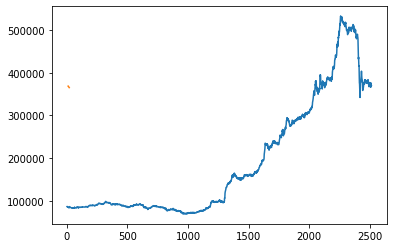

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)